# CIFAR10
### 10 classes

This notebook contains waleed's code and my experiments over it.

In [ ]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten

In [ ]:
# The CIFAR10 dataset contains 60,000 color images in 10 classes, 
# with 6,000 images in each class. The dataset is divided into 50,000 training
# images and 10,000 testing images.
data = cifar10
(X_train, Y_train), (X_test, Y_test) = data.load_data()


170508288/170498071 [==============================] - 2s 0us/step


Plot sample picture

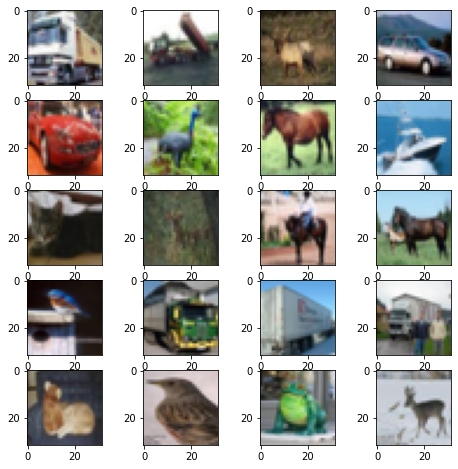

In [ ]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

**Building the model**

In [ ]:
# Model contains 04 sets: 03 for CNN and 01 for Dense.

model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) # Changed by me from 0.4
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_31 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_32 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

**Compile Model**

In [ ]:
# run this cell again. before: rmsprop
model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [ ]:
# My comment:
  # No need to mention learning rate for the optimizer because by default it is equal to 0.001

**Train the model**

In [ ]:
history = model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
1563/1563 [==============================] - 14s 8ms/step - loss: 1.5334 - accuracy: 0.4747
Epoch 2/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9479 - accuracy: 0.6726
Epoch 3/100
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8018 - accuracy: 0.7251
Epoch 4/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7162 - accuracy: 0.7557
Epoch 5/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6612 - accuracy: 0.7776
Epoch 6/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6153 - accuracy: 0.7917
Epoch 7/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5760 - accuracy: 0.8069
Epoch 8/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5514 - accuracy: 0.8146
Epoch 9/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5235 - accuracy: 0.8229
Epoch 10/100
1563/1563 [==============================] - 12s 8m

**PLOT**

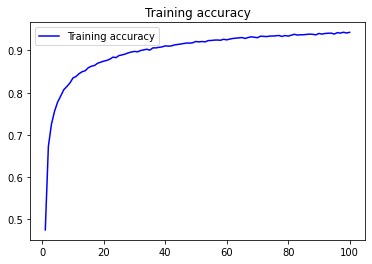

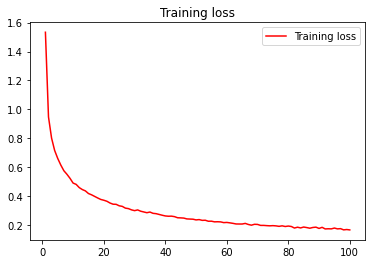

In [ ]:
# Plot Model Loss and Accuracy During Training
%matplotlib inline
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss', color='r')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
# TOTAL TIME = 18m (11s for each epoch)
# training acc is 95%

In [ ]:
# WALEED's TIME:
  # Each epoch took 30s

**EVALUATION**

In [ ]:
# EVALUATION:
# Why evaluation on test data is not done by Waleed?

# ACCURACY = 88%
  # CIFAR10 got 70%

model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4887 - accuracy: 0.8640


[0.48873311281204224, 0.8640000224113464]

**My experiments**

In [ ]:
# MODEL 02:
  # CHANGES: Removing the repetitive layers present inside the sets of CNN.

  # Total params reduced from 553k to 358k
  # TOTAL TIME = (8s for each epoch)
  # training acc = 84%
  # TEST acc =  80%
  # RESULT = useless

In [ ]:
# MODEL 03:
  # CHANGES: in the dropout of the 2nd and the third set of CNN.
    # 2nd ====> 0.3 to 0.4
    # 3rd ====> 0.4 to 0.5

  # TOTAL TIME = (8s for each epoch)
  # training acc = 93%
  # TEST acc = 87.74%
  # RESULT = useless

In [ ]:
# MODEL 04:
  # CHANGES: in the dropout of the Dense set.
    # 0.4 to 0.5
      # TOTAL TIME = (10s for each epoch)
  # training acc = 95%
  # TEST acc = 88.04%
  # RESULT = SAME

In [ ]:
# MODEL 05:
  # CHANGES: in the optimizer from Adam to rmsprop.

  # TOTAL TIME = 19m (12s for each epoch)

  # TEST acc = 86%
  # RESULT = useless

**TESTING**

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[1.65867249e-08, 4.63544190e-08, 3.23553678e-07, 9.97462869e-01,
        6.03109118e-09, 2.53019598e-03, 6.42426176e-06, 7.43489981e-09,
        4.14682022e-09, 3.58925778e-10],
       [2.72113674e-08, 8.29426790e-05, 1.48171189e-13, 4.66924134e-13,
        9.85166572e-15, 1.12331212e-13, 4.25633617e-12, 1.95991693e-15,
        9.99917030e-01, 8.22274970e-10],
       [5.62490568e-05, 2.16618733e-04, 9.54318921e-07, 1.19027135e-08,
        4.12184731e-09, 1.21923890e-07, 1.53465621e-07, 3.91543935e-08,
        9.99723971e-01, 1.87324383e-06],
       [8.10774624e-01, 3.71959363e-03, 9.17435536e-05, 3.18669336e-04,
        9.01260137e-06, 1.80301782e-07, 4.32836350e-05, 2.39499855e-06,
        1.83298424e-01, 1.74215517e-03],
       [1.48005289e-11, 1.81155468e-09, 9.40347672e-06, 3.70431685e-08,
        1.59196243e-05, 1.38952294e-10, 9.99974608e-01, 6.71659248e-14,
        8.86498722e-11, 1.33600589e-10]], dtype=float32)

In [ ]:
import numpy as np
y_classes = [np.argmax(element) for element in y_pred]
y_classes[20:40]

[7, 0, 4, 9, 4, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 8, 4, 9, 9, 5]

In [ ]:
Y_test[20:40].reshape(-1,)

array([7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5],
      dtype=uint8)

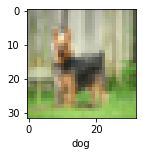

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_test, Y_test.reshape(-1,), 24)

In [ ]:
classes[y_classes[24]]
# Model is declaring a dog as a deer.

'deer'